# *Car price prediction model for 'Geely Auto' using Linear regression*

In [1]:
import numpy as np  # Importing the required libraries and packages
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
# importing all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('cars_data.csv') # Reading the cars data into the data frame

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape # Knowing the dimensions of the data frame


(205, 26)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* It can be noticed that there is no missing data or null values in the data frame

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data cleaning

In [7]:
df = df.drop('car_ID',axis=1) # Removing the car_ID column as it contributes nothing in the price analysis.

df.head()


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Extracting Car Company from the CarName  
df['CarName'] = df['CarName'].str.split(' ',expand=True)

df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Checking for Unique Car companies 
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

* it can be noticed that few car company names are misspelled. so, correcting all such errors.

In [10]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Segregation/Seperation of Numerical and Categorical Variables/Columns in the data set
cat_col = df.select_dtypes(include=['object']).columns

num_col = df.select_dtypes(exclude=['object']).columns

df_cat = df[cat_col]

df_num = df[num_col]

In [12]:
df_cat.head() # categorical column data set

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [13]:
df_num.head() # numerical column data set

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
print(df_cat.shape)

print(df_num.shape)

(205, 10)
(205, 15)


* It can be observed that there are 11 categorical variables and 14 numerical values in the data frame.


# Visualizing the Data

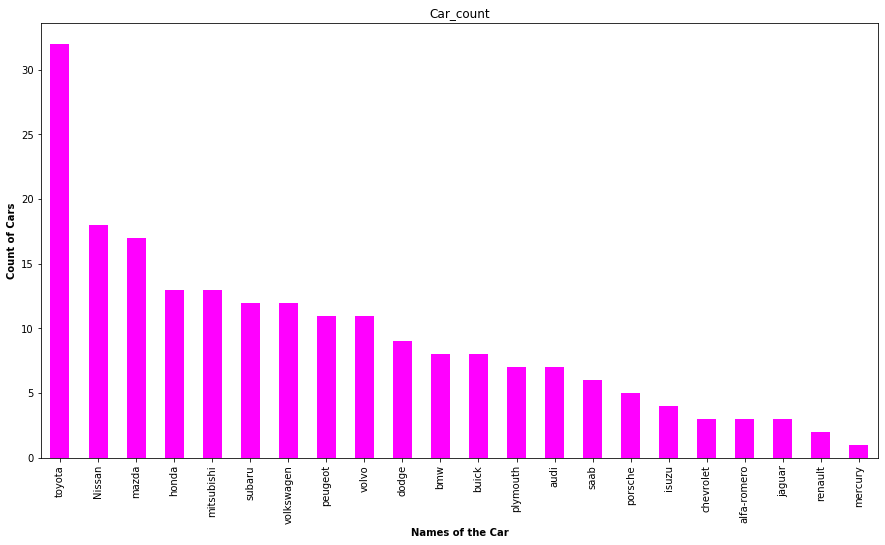

In [15]:
# Visualizing number of cars for each car name in the data set
plt.figure(figsize = [15,8])
ax=df['CarName'].value_counts().plot(kind='bar',stacked=False, colormap = 'cool_r')
ax.title.set_text('Car_count')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')
plt.show()

 * Toyota comapany has the highest number of cars in the given data followed by Nissan, Mazda and the rest.

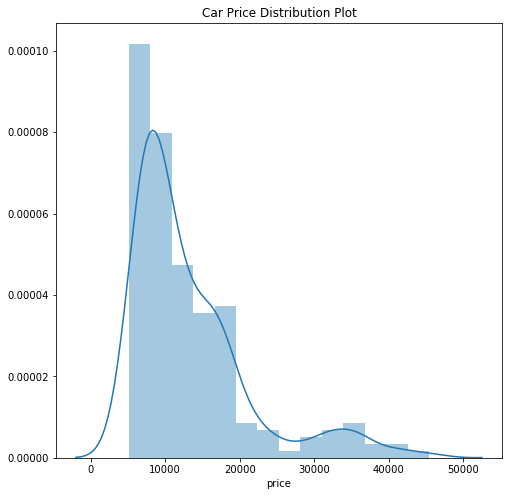

In [16]:
# Visualizing the distribution of car prices
plt.figure(figsize=(8,8))
plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])
plt.show()

* Most of the car prices are below 20000  

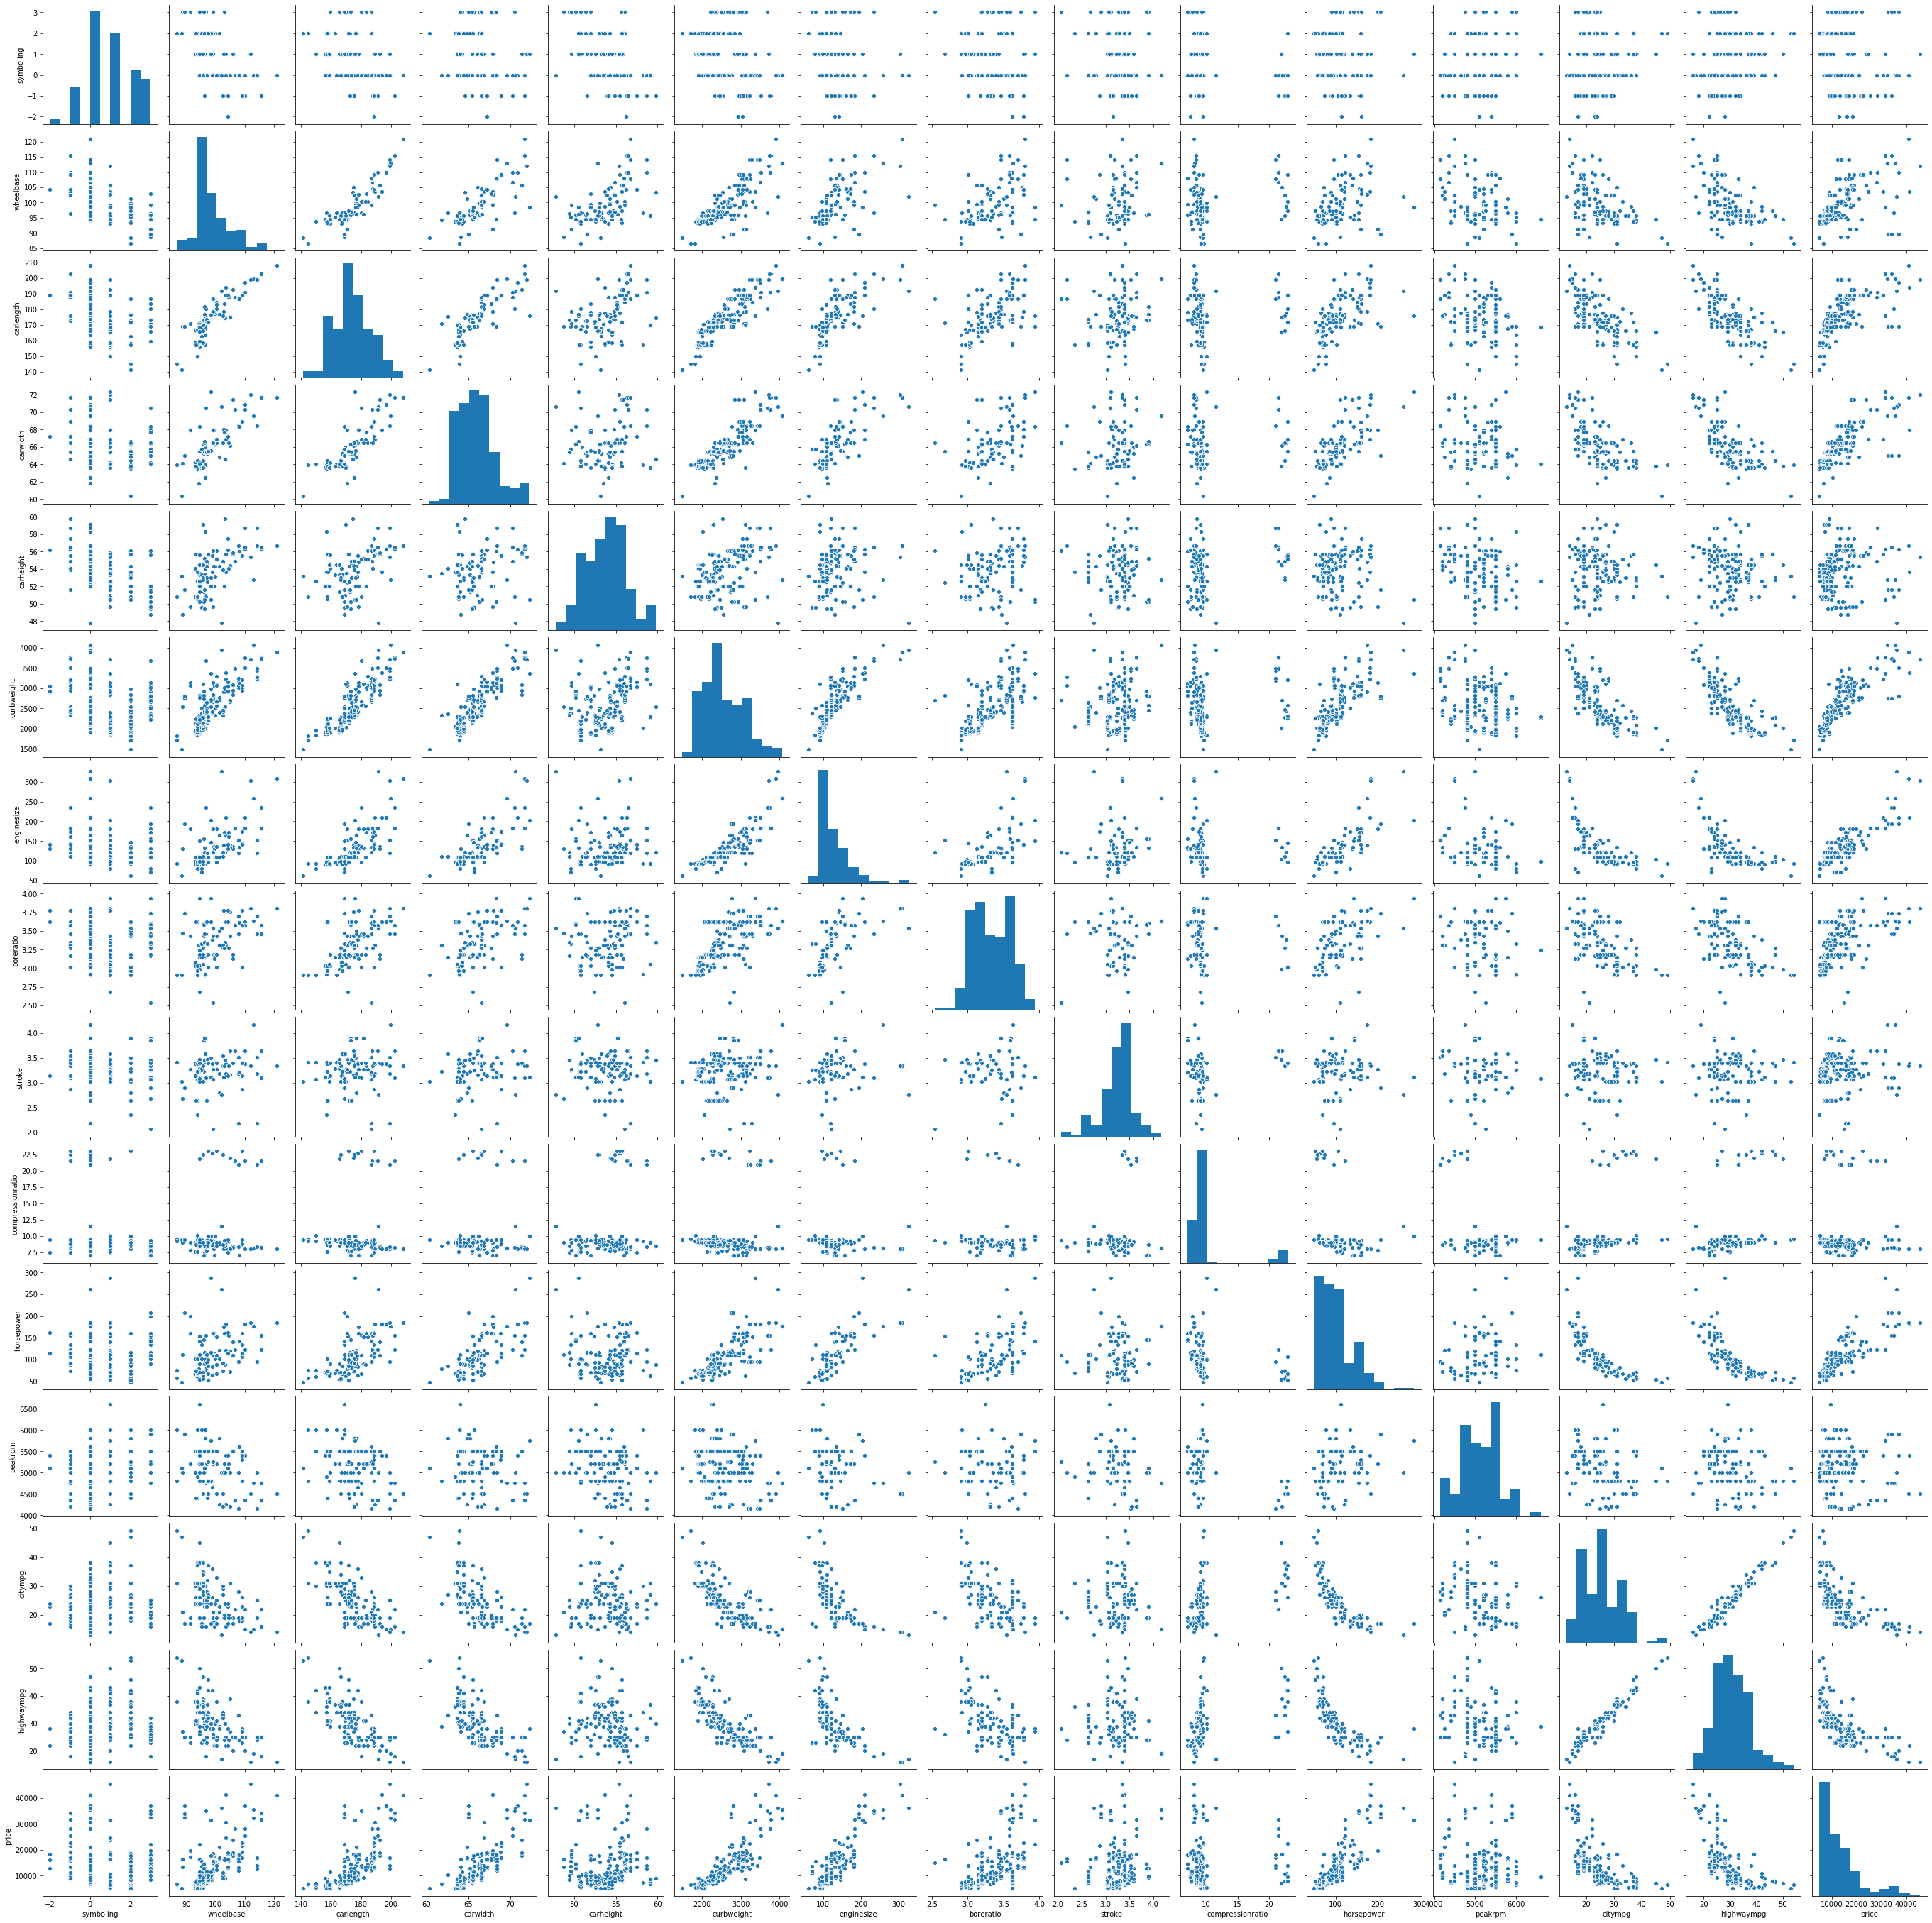

In [17]:
# Pair plot for all the numeric variables
ax = sns.pairplot(df[num_col])

* It can be noticed that:
* 1)Carlength, carwidth, curbweight, enginesize, horsepower seems to have a positivecorrelation with the output variable 'Price'. 

* 2)carheight doesn't show any significant trend with the output variable.

* 3)citympg, highwaympg seem to have a significant negative correlation with the output variable.

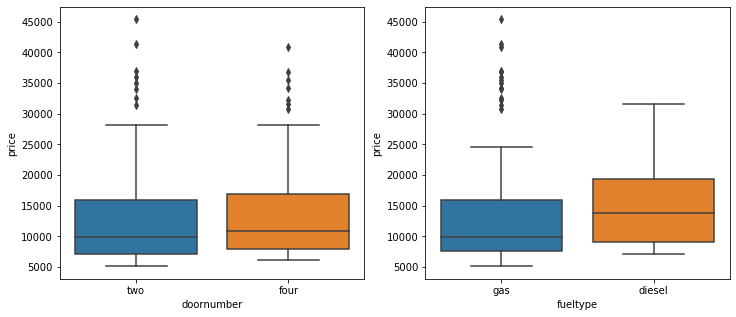

In [18]:
# Box  plot for all the categorical variables
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)

* It can be noticed that:

* The number of doors in car is not affecting the price of car much.
    
    
* The cars with fueltype as diesel are comparitively expensive than car with fueltype as gas.

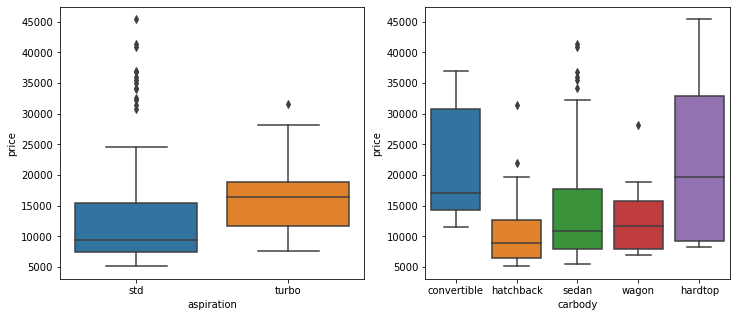

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.boxplot(x = 'aspiration', y = 'price', data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = df)

* All types of carbody is relatively cheaper compared to hardtop, convertible carbody

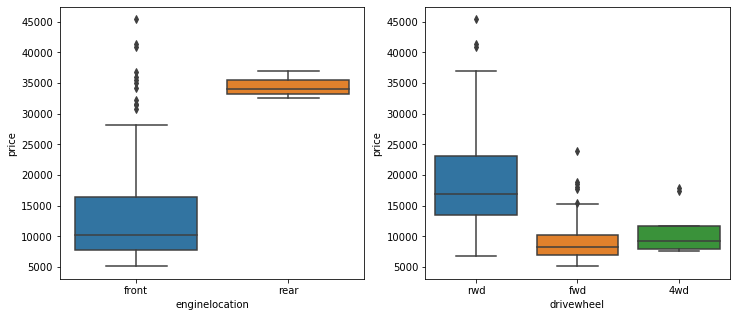

In [20]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)

* The cars with rear enginelocation are way expensive than cars with front enginelocation.

* Higher end cars seems to have rwd drivewheel.

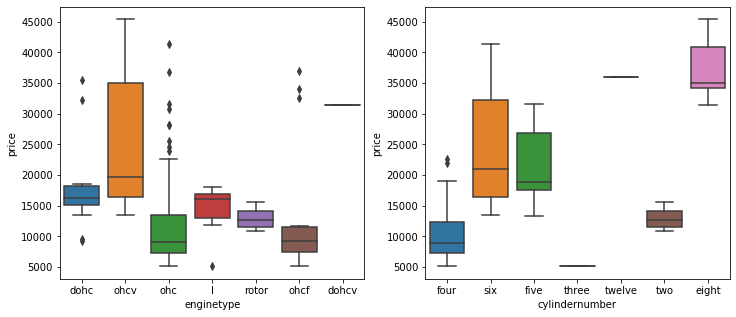

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x = 'enginetype', y = 'price', data = df)

plt.subplot(1,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)


* Enginetype ohcv comes into higher price range cars.


* The price of the car is directly proportional to number of cylinders in most of the cases.

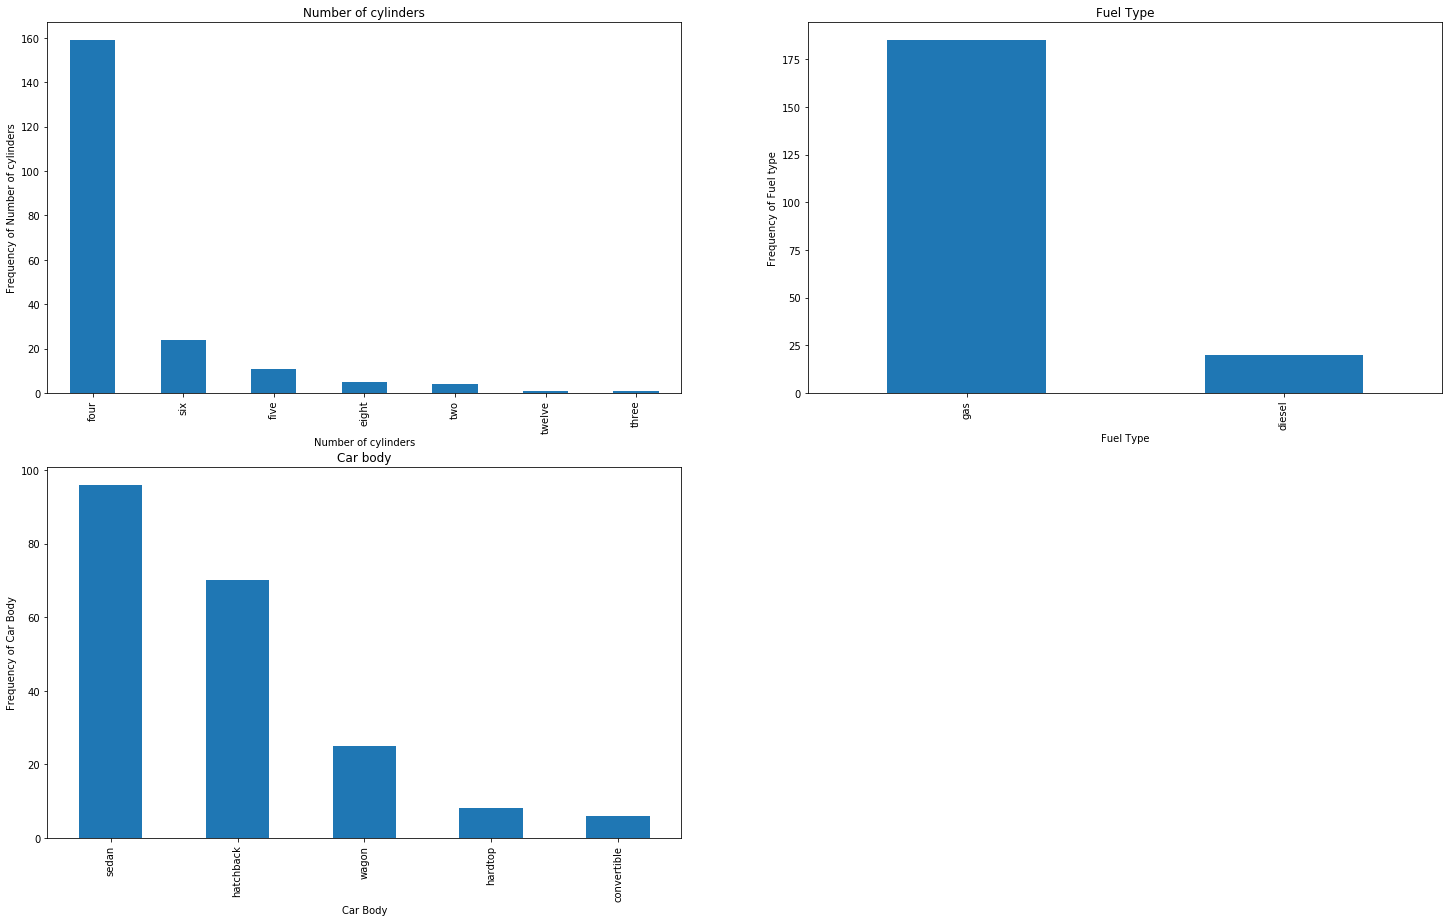

In [22]:
# Visualizing some more variables
plt.figure(figsize=(25, 15))
plt.subplot(2,2,1)
plt1 = df['cylindernumber'].value_counts().plot(kind ='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')


plt.subplot(2,2,2)
plt1 = df['fueltype'].value_counts().plot(kind ='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')



plt.subplot(2,2,3)
plt1 = df['carbody'].value_counts().plot(kind ='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')
plt.show()

* The number of cylindres in most cars is four

* Number of Gas fueles way more in number than diesel fueled cars.

* Sedan is the most preferred car type.

<Figure size 3600x720 with 0 Axes>

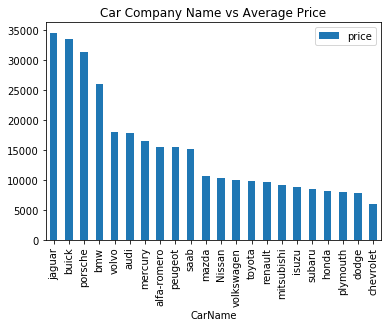

In [23]:
plt.figure(figsize=(50, 10))
df_autox = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

* Jaguar, Buick and Porsche seems to have the highest average price.

<Figure size 1440x432 with 0 Axes>

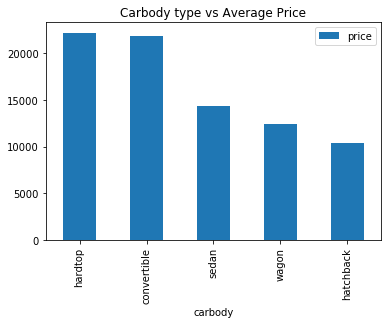

In [24]:
plt.figure(figsize=(20, 6))
df_autoy = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_autoy.plot.bar()
plt.title('Carbody type vs Average Price')
plt.show()

* Hardtop and convertible seems to have the highest average price.

In [25]:
#Binning the Car Companies based on avg prices of each car Company using groupby and merge functions
df['price'] = df['price'].astype('int')
df_temp = df.copy()

t = df_temp.groupby(['CarName'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)

df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


## Significant variables after Visualization

In [26]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']
df = df[sig_col]

df.shape 

(205, 17)

## Data Preparation

### Dummy variables

In [27]:
sig_cat_col = ['Cars_Category','enginetype','fueltype','aspiration','carbody','cylindernumber','drivewheel']
# Getting the dummy variables for the categorical feature and storing it in a new variable - 'dummies'
dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape

(205, 29)

In [28]:
# getting k-1 dummies out of k categorical levels by removing the first level.
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [29]:
# Adding the results to the original dataframe
df = pd.concat([df, dummies], axis = 1)
df.shape

(205, 39)

In [30]:
df.sample(5)

,price,Cars_Category,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
5,15250,Medium_Range,ohc,gas,std,sedan,five,fwd,99.8,2507,...,1,0,1,0,0,0,0,0,1,0
145,11259,Budget_Friendly,ohcf,gas,turbo,sedan,four,4wd,97.0,2510,...,1,0,0,1,0,0,0,0,0,0
23,7957,Budget_Friendly,ohc,gas,turbo,hatchback,four,fwd,93.7,2128,...,0,0,0,1,0,0,0,0,1,0
108,13200,Medium_Range,l,diesel,turbo,sedan,four,rwd,107.9,3197,...,1,0,0,1,0,0,0,0,0,1
30,6479,Budget_Friendly,ohc,gas,std,hatchback,four,fwd,86.6,1713,...,0,0,0,1,0,0,0,0,1,0


In [31]:
# Dropping the original categorical variables as dummies are already created
df.drop( sig_cat_col, axis = 1, inplace = True)
df.shape

(205, 32)

## Splitting the Data into Training and Testing Sets


In [32]:
df.sample(10)


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
72,35056,96.6,3685,234,3.46,155,16,18,180.3,70.5,...,0,0,0,0,0,0,0,0,0,1
17,36880,110.0,3505,209,3.62,182,15,20,197.0,70.9,...,1,0,0,0,1,0,0,0,0,1
82,12629,95.9,2833,156,3.58,145,19,24,173.2,66.3,...,0,0,0,1,0,0,0,0,1,0
85,6989,96.3,2365,122,3.35,88,25,32,172.4,65.4,...,1,0,0,1,0,0,0,0,1,0
89,5499,94.5,1889,97,3.15,69,31,37,165.3,63.8,...,1,0,0,1,0,0,0,0,1,0
98,8249,95.1,2008,97,3.15,69,31,37,162.4,63.8,...,0,0,0,1,0,0,0,0,1,0
145,11259,97.0,2510,108,3.62,111,24,29,172.0,65.4,...,1,0,0,1,0,0,0,0,0,0
95,7799,94.5,2028,97,3.15,69,31,37,165.6,63.8,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,1,0,0,0,0,0,0,0
201,19045,109.1,3049,141,3.78,160,19,25,188.8,68.8,...,1,0,0,1,0,0,0,0,0,1


In [33]:
# Making sure that the train and test data set have the same rows, respectively
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)


(143, 32)
(62, 32)


## Rescaling the Features


In [34]:
scaler = preprocessing.StandardScaler()
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
# Appling scaler() to all the columns except the 'dummy' variables
df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])
df_train.sample(5)

<ipython-input-34-1dc4b2020695>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])
c:\users\visitor_2\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
103,0.056900,0.315930,0.958998,1.372551,0.471340,1.249192,-0.957048,-0.845291,0.890809,0.299187,...,1,0,0,0,1,0,0,0,1,0
150,-0.990829,-0.475189,-1.021682,-0.807191,-0.989734,-1.024476,1.438713,1.169319,-1.172279,-1.015143,...,0,0,0,1,0,0,0,0,1,0
60,-0.586314,0.046613,-0.238622,-0.072447,0.317543,-0.468690,0.091098,0.162014,0.349149,0.299187,...,1,0,0,1,0,0,0,0,1,0
54,-0.727707,-0.912829,-1.086169,-0.831683,-0.874386,-0.872898,0.839773,1.025419,-0.527066,-0.743213,...,1,0,0,1,0,0,0,0,1,0
116,0.629031,1.578353,1.312757,0.662298,1.509472,-0.190797,0.390568,0.305915,1.058087,1.160299,...,1,0,0,1,0,0,0,0,0,1


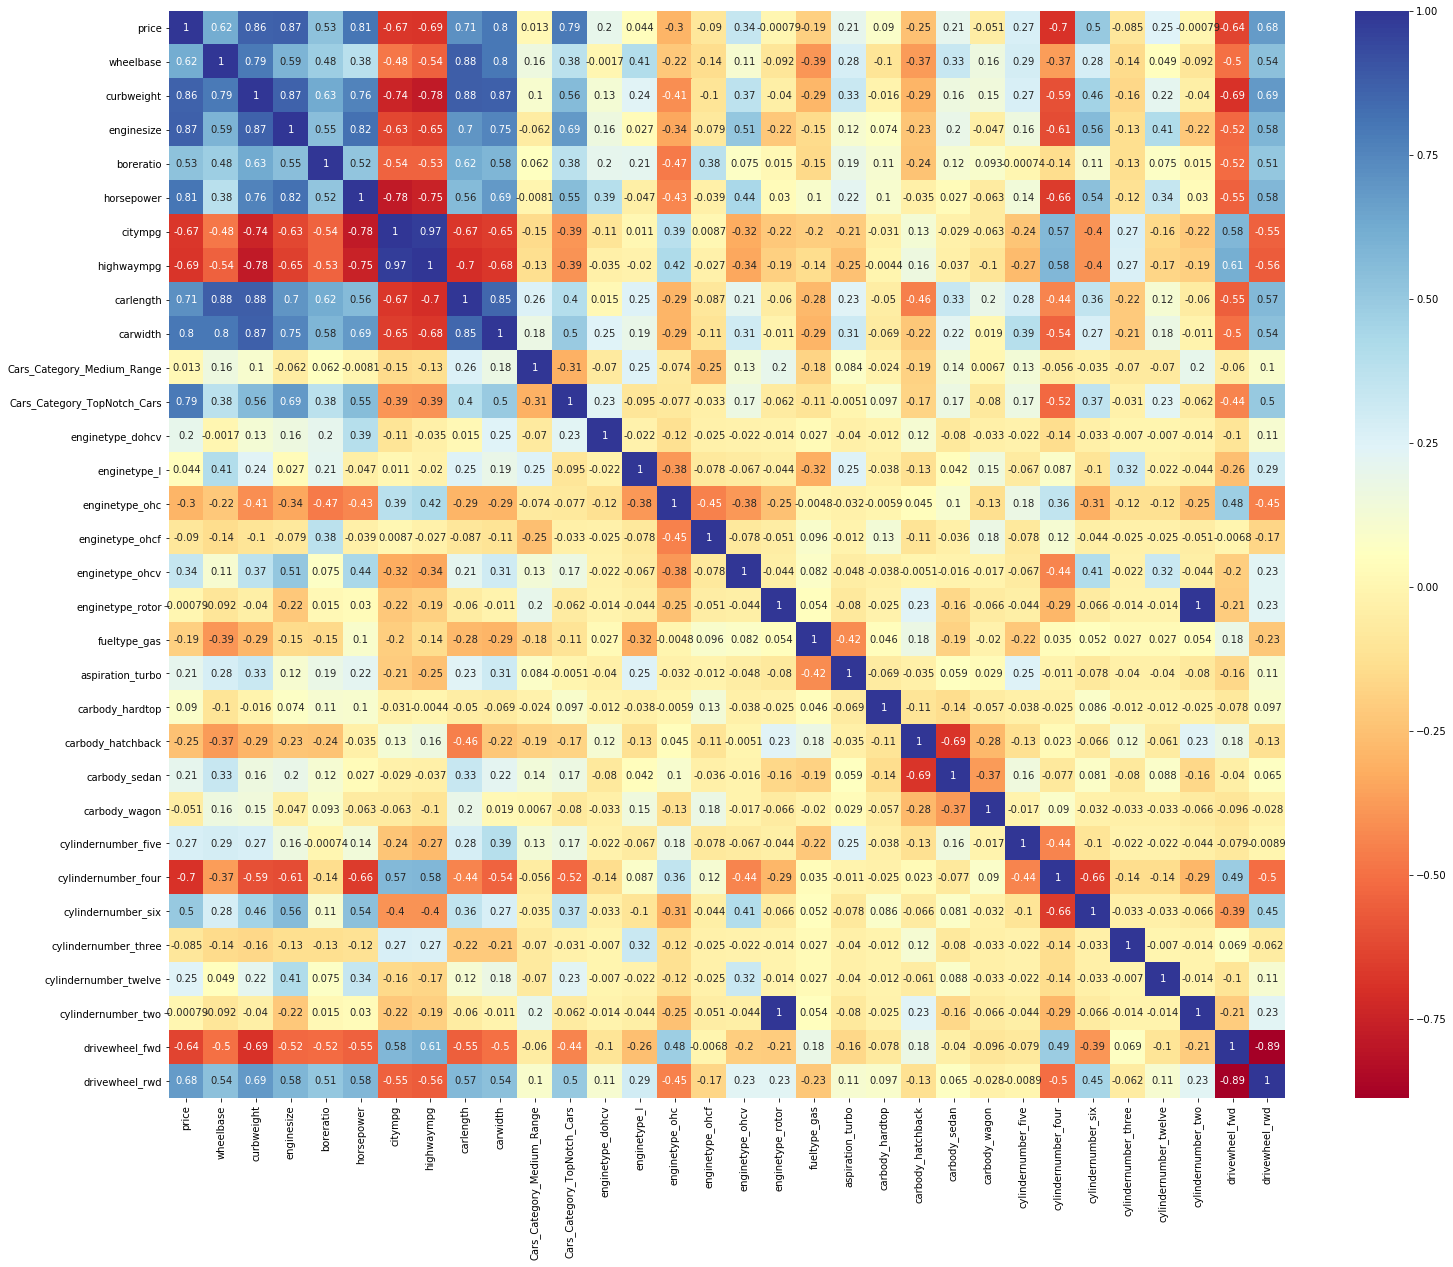

In [35]:
# Checking the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), cmap="RdYlBu",annot=True)
plt.show()

### Scatter plot for few correlated variables vs price.


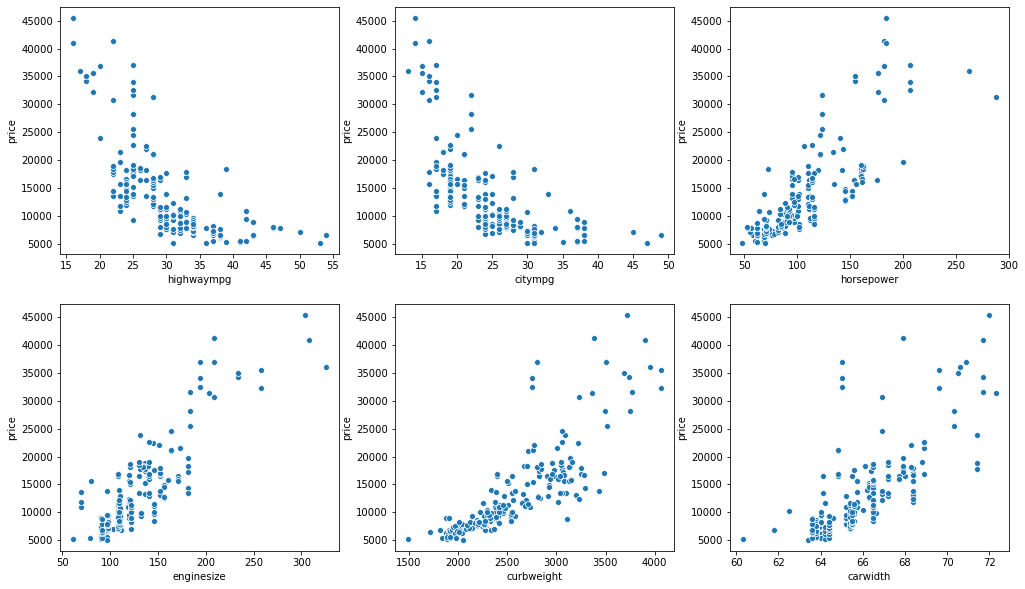

In [36]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']
# Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=(17, 10))
plt.subplot(2,3,1)
sns.scatterplot(x = 'highwaympg', y = 'price', data = df)

plt.subplot(2,3,2)
sns.scatterplot(x = 'citympg', y = 'price', data = df)

plt.subplot(2,3,3)
sns.scatterplot(x = 'horsepower', y = 'price', data = df)

plt.subplot(2,3,4)
sns.scatterplot(x = 'enginesize', y = 'price', data = df)

plt.subplot(2,3,5)
sns.scatterplot(x = 'curbweight', y = 'price', data = df)

plt.subplot(2,3,6)
sns.scatterplot(x = 'carwidth', y = 'price', data = df)
plt.show()

In [37]:
# Dividing into X and Y sets for model building
y_train = df_train.pop('price')
X_train = df_train
y_train.sample(2)

149   -0.175114
24    -0.877585
Name: price, dtype: float64

In [38]:
X_train.sample(2)


,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
97,-0.677177,-0.925872,-0.684734,-0.605241,-0.847635,0.839773,0.881518,-0.256236,-0.924500,1,...,0,1,0,1,0,0,0,0,1,0
152,-0.475189,-0.966407,-0.807191,-0.989734,-1.024476,0.839773,1.025419,-1.172279,-1.015143,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
# Shapes of X_train,y_train
print(X_train.shape)
print(y_train.shape)

(143, 31)
(143,)


## Building a linear model


In [40]:
# Building a simple linear model with the most highly correlated variable enginesize
X_train_1 = X_train['enginesize']

# Adding a constant
X_train_1c = sm.add_constant(X_train_1)

# Creating a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

# Checking parameters created
lr_1.params

const         7.112366e-17
enginesize    8.679152e-01
dtype: float64

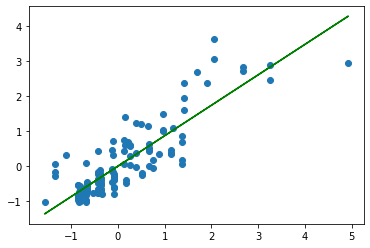

In [41]:
# visualising the data with a scatter plot and the fitted regression line
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8679*X_train_1c.iloc[:, 1], 'g')
plt.show()

In [42]:
# checking the summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           1.09e-44
Time:                        13:11:53   Log-Likelihood:                -102.84
No. Observations:                 143   AIC:                             209.7
Df Residuals:                     141   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.112e-17      0.042    1.7e-15      1.0

* With simple linear regression i.e., enginesize and price, the obtained R square value is 75%.

###  Adding more variables


In [43]:
X_train_2 = X_train[['enginesize','horsepower', 'curbweight']]

# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()
lr_2.params

const         5.204170e-17
enginesize    3.400426e-01
horsepower    2.288470e-01
curbweight    3.938203e-01
dtype: float64

In [44]:
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           2.16e-51
Time:                        13:11:53   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.204e-17      0.036   1.44e-15      1.0

### Considering all 13 correlated variables as from the correlation Heat map


In [45]:
X_train_3 = X_train[['enginesize', 'curbweight','horsepower', 'carwidth','Cars_Category_TopNotch_Cars','carlength','drivewheel_rwd','drivewheel_fwd','cylindernumber_four','citympg','highwaympg']]
# Add a constant
X_train_3c = sm.add_constant(X_train_3)
# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

lr_3.params



const                          0.012071
enginesize                     0.042726
curbweight                     0.197127
horsepower                     0.196106
carwidth                       0.164218
Cars_Category_TopNotch_Cars    1.133604
carlength                      0.048033
drivewheel_rwd                 0.120261
drivewheel_fwd                -0.026184
cylindernumber_four           -0.233819
citympg                        0.073779
highwaympg                    -0.042347
dtype: float64

In [46]:
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           8.62e-66
Time:                        13:11:53   Log-Likelihood:                -23.354
No. Observations:                 143   AIC:                             70.71
Df Residuals:                     131   BIC:                             106.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

## Making Predictions Using the Final Model


In [47]:
# Applying the scaling on the test sets
df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

<ipython-input-47-1a359998b60a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
c:\users\visitor_2\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(62, 32)

In [48]:
# Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_3c.columns]

# Making predictions using the final model
y_pred = lr_3.predict(X_test_new)

## Model Evaluation


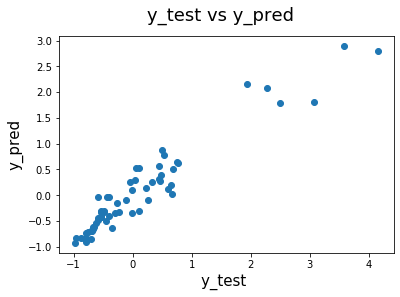

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=18)   
plt.xlabel('y_test ', fontsize=15)                       
plt.ylabel('y_pred', fontsize=15)    
plt.show()

## R Square value


In [50]:
r2_score(y_test, y_pred)


0.8926458920564234

**The R2 score of the training set is 0.91 and the test set is 0.89 which is very much close. Hence, this model is good enough to predict Car prices with the above variables.**
